# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [2]:
#set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [6]:
#Q1
#load data
df = pd.read_csv("corporate_ratings.csv")
#print out first few rows of data
print(df.head())
#print out observations and variables
print("Number of observations (rows):", df.shape[0])
print("Number of variables (columns):", df.shape[1])

  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          

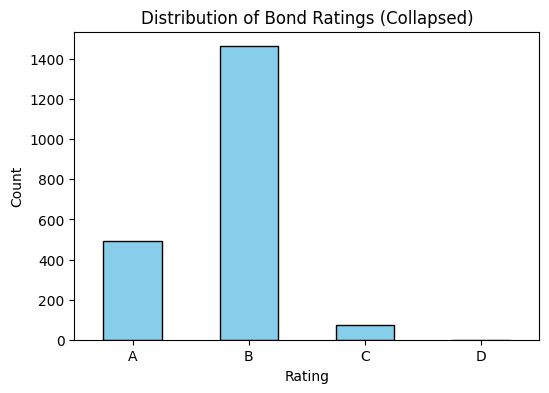

In [7]:
#Q2
import matplotlib.pyplot as plt

#collapse ratings
df['Rating'] = df['Rating'].replace({
    'AAA': 'A',
    'AA': 'A',
    'A': 'A',
    'BBB': 'B',
    'BB': 'B',
    'B': 'B',
    'CCC': 'C',
    'CC': 'C',
    'C': 'C',
    'D': 'D'
})

#create histogram w/ collapsed values
plt.figure(figsize=(6, 4))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Bond Ratings (Collapsed)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [8]:
#Q3
# Drop unused columns
drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
df_model = df.drop(columns=drop_cols, errors='ignore')

# One-hot encode the 'Sector' variable
df_model = pd.get_dummies(df_model, columns=['Sector'], drop_first=True)

# Define feature matrix X and target vector y
X = df_model.drop(columns=['Rating'], errors='ignore')  # in case it's still there
y = df['Rating']  # collapsed rating from step 2

# Check result
print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)
print("\nColumns in X:")
print(X.columns.tolist()[:15], "...")  # print a sample of the columns


Feature matrix shape (X): (2029, 36)
Target vector shape (y): (2029,)

Columns in X:
['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio'] ...


Model Accuracy: 0.682


<Figure size 500x400 with 0 Axes>

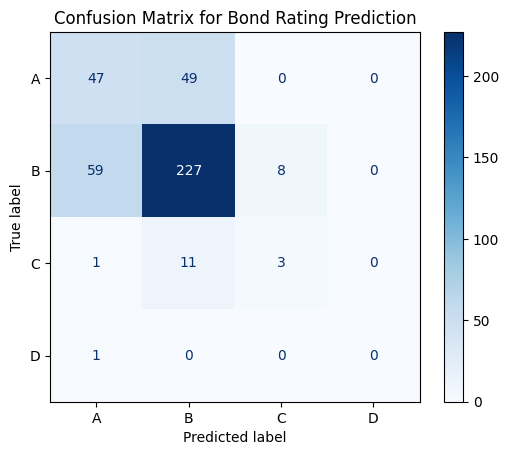

In [9]:
#Q4
#split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# Fit the model
tree.fit(X_train, y_train)

#predict and evaluate
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.3f}")

#create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

plt.figure(figsize=(5, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Bond Rating Prediction")
plt.show()

Model Accuracy (with Rating Agency): 0.756


<Figure size 500x400 with 0 Axes>

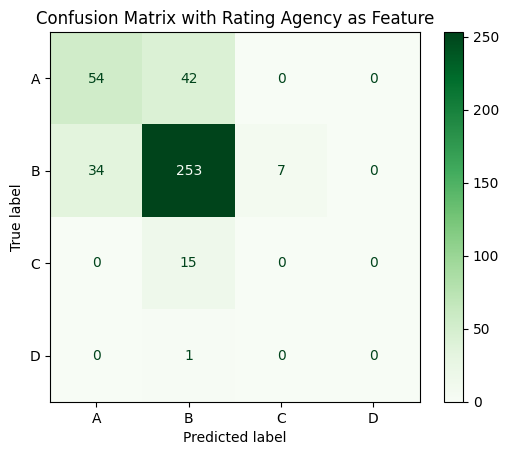

In [10]:
#Q5
#copy original dataframe again to include Rating Agency Name
df_with_agency = df.copy()

#drop unnecessary columns
drop_cols = ['Rating', 'Date', 'Name', 'Symbol']
df_with_agency = df_with_agency.drop(columns=drop_cols, errors='ignore')

#Sector and Rating Agency Name
df_with_agency = pd.get_dummies(df_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

#define X and y
X_agency = df_with_agency.drop(columns=['Rating'], errors='ignore')
y_agency = df['Rating']

#split into test/train
X_train, X_test, y_train, y_test = train_test_split(X_agency, y_agency, test_size=0.2, random_state=42)

# Train model with same hyperparameters
tree_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_agency.fit(X_train, y_train)

#predict and evaluate
y_pred_agency = tree_agency.predict(X_test)
acc_agency = accuracy_score(y_test, y_pred_agency)

print(f"Model Accuracy (with Rating Agency): {acc_agency:.3f}")

#create confusion matrix
cm_agency = confusion_matrix(y_test, y_pred_agency, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_agency, display_labels=sorted(y.unique()))

plt.figure(figsize=(5, 4))
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix with Rating Agency as Feature")
plt.show()